In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
spotify_data = pd.read_csv("high_popularity_spotify_data.csv")

spotify_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [39]:
#Encontrar valores nulos
spotify_data.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64

In [40]:
#Chequeamos que no existan valores duplicados.
spotify_data.duplicated().value_counts()

False    1686
Name: count, dtype: int64

In [41]:
#Descripción de los datos

spotify_data.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [42]:
# Función para convertir milisegundos a minutos:segundos
def ms_to_minutes_seconds(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    return f"{int(minutes)}:{int(seconds):02}"

# Agrupar por 'playlist_genre', calcular la duración promedio y convertir a minutos:segundos
duration_by_genre = spotify_data.groupby('playlist_genre')['duration_ms'].mean().reset_index()
duration_by_genre['duration_mm_ss'] = duration_by_genre['duration_ms'].apply(ms_to_minutes_seconds)

# Ordenar por duración promedio en milisegundos (opcional)
duration_by_genre = duration_by_genre.sort_values(by='duration_ms', ascending=False)

# Mostrar los resultados con formato mm:ss
print(duration_by_genre[['playlist_genre', 'duration_mm_ss']])



   playlist_genre duration_mm_ss
19          metal           5:06
3           blues           4:20
24           rock           4:09
11         indian           4:00
23         reggae           3:52
16         korean           3:44
12          indie           3:42
22            r&b           3:39
1         ambient           3:39
20            pop           3:37
21           punk           3:36
25           soul           3:33
27          world           3:33
13          j-pop           3:29
17          latin           3:28
8            folk           3:22
7      electronic           3:20
10        hip-hop           3:19
5       classical           3:17
14           jazz           3:11
18           lofi           3:03
2          arabic           3:02
15          k-pop           3:01
6         country           3:00
0       afrobeats           2:57
9          gaming           2:53
26        turkish           2:46
4       brazilian           2:18


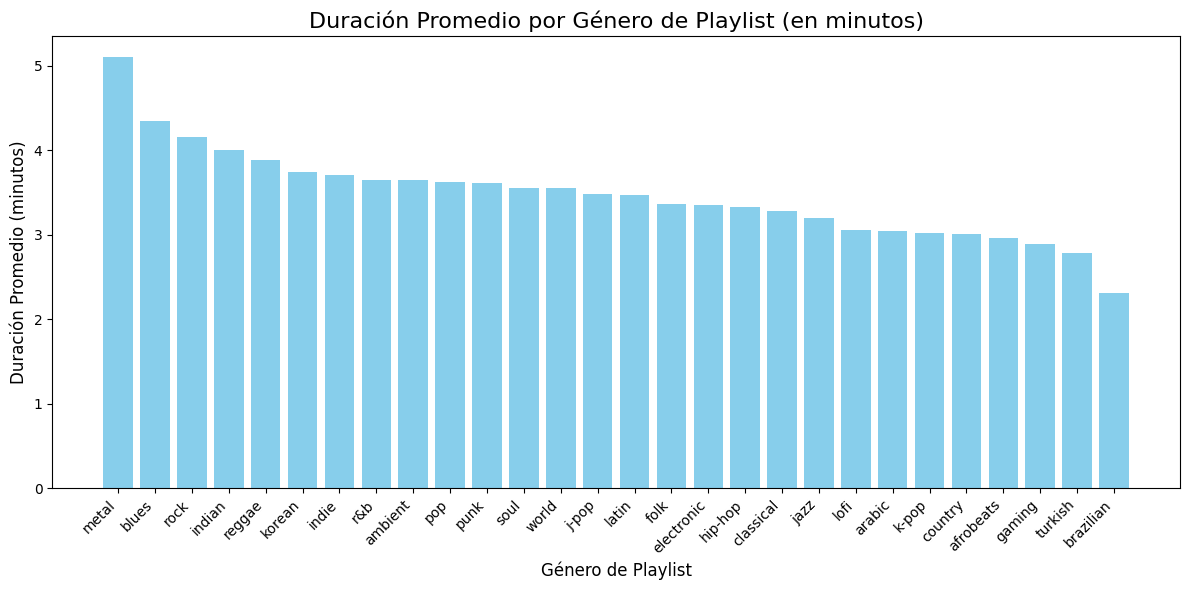

In [43]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(duration_by_genre['playlist_genre'], duration_by_genre['duration_ms'] / 60000, color='skyblue')

# Personalizar el gráfico
plt.title('Duración Promedio por Género de Playlist (en minutos)', fontsize=16)
plt.xlabel('Género de Playlist', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


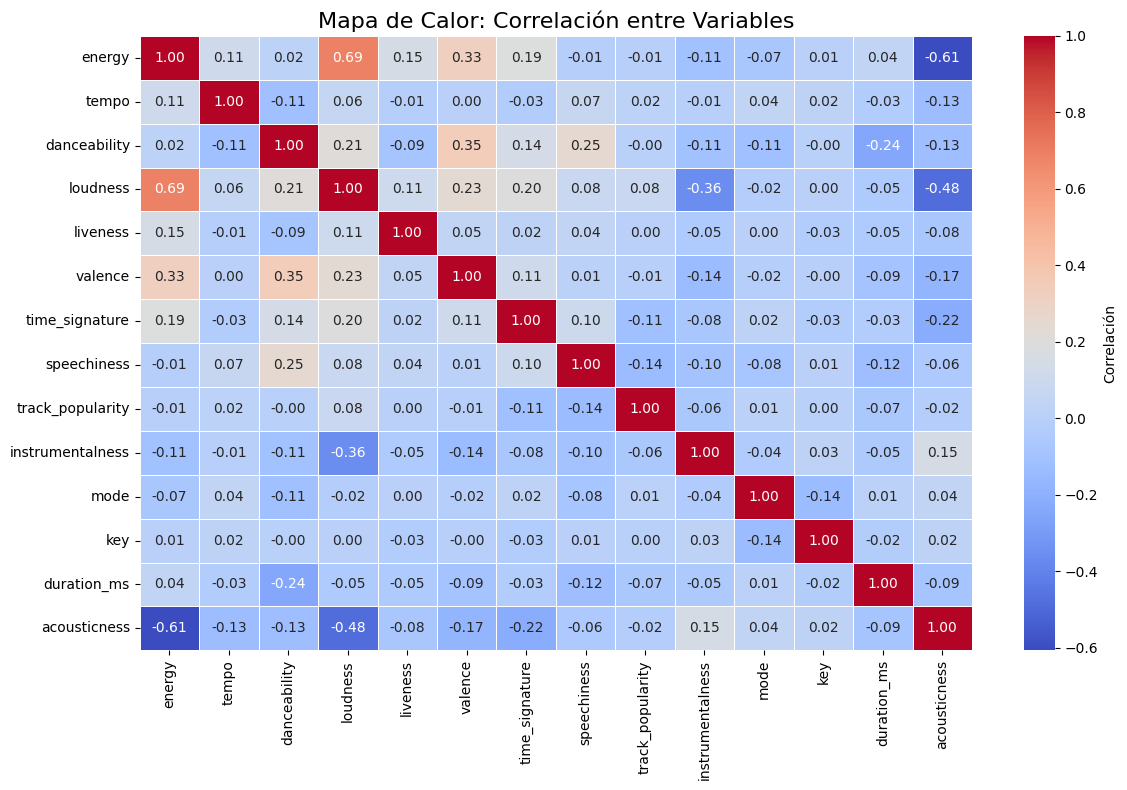

In [49]:
# Seleccionar las columnas numéricas para calcular la correlación
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Correlación'},
    linewidths=0.5
)

# Configurar el título
plt.title('Mapa de Calor: Correlación entre Variables', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [51]:
#¿Qué géneros tienen mayor bailabilidad promedio?

# Calcular la bailabilidad promedio por género
bailabilidad_genero = spotify_data.groupby('playlist_genre')['danceability'].mean().reset_index()

# Ordenar de mayor a menor
bailabilidad_genero = bailabilidad_genero.sort_values(by='danceability', ascending=False)

# Mostrar resultados
print(bailabilidad_genero)


   playlist_genre  danceability
23         reggae      0.880000
4       brazilian      0.797786
15          k-pop      0.757091
2          arabic      0.756760
17          latin      0.744060
10        hip-hop      0.735982
27          world      0.716250
9          gaming      0.709260
12          indie      0.703250
11         indian      0.681778
7      electronic      0.677419
20            pop      0.652067
26        turkish      0.645714
22            r&b      0.637120
0       afrobeats      0.637050
3           blues      0.624822
13          j-pop      0.617091
25           soul      0.576000
16         korean      0.569000
8            folk      0.566879
6         country      0.545667
24           rock      0.545162
1         ambient      0.532918
18           lofi      0.510000
21           punk      0.493000
19          metal      0.444400
14           jazz      0.349000
5       classical      0.275000


In [57]:
# ¿Existe una relación entre bailabilidad y otras métricas como energía, tempo o valencia?

# Seleccionar solo columnas numéricas
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de 'danceability' con otras variables numéricas
bailabilidad_corr = numeric_columns.corr()['danceability'].sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(bailabilidad_corr)



danceability        1.000000
valence             0.347296
speechiness         0.248474
loudness            0.212603
time_signature      0.144239
energy              0.017729
key                -0.000311
track_popularity   -0.002220
liveness           -0.088201
instrumentalness   -0.108383
tempo              -0.111264
mode               -0.112468
acousticness       -0.125767
duration_ms        -0.242914
Name: danceability, dtype: float64


C:\Users\Federico\AppData\Local\Temp\ipykernel_20160\343564502.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=danceability_by_genre, x='danceability', y='playlist_genre', palette='viridis')


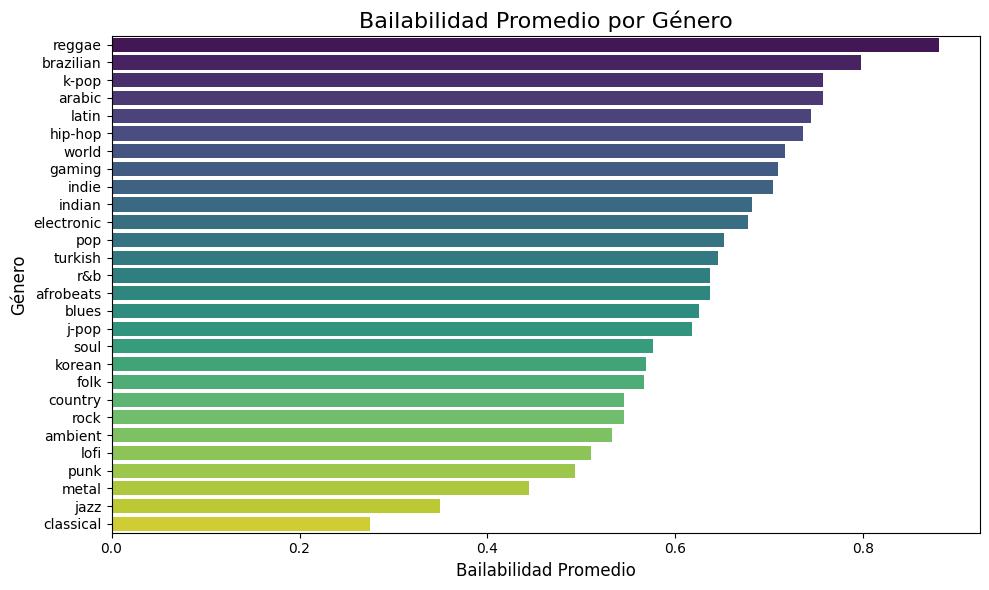

In [56]:
#Gráfico: Bailabilidad por Género

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=danceability_by_genre, x='danceability', y='playlist_genre', palette='viridis')

# Personalizar
plt.title('Bailabilidad Promedio por Género', fontsize=16)
plt.xlabel('Bailabilidad Promedio', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()

# Guardar el gráfico como imagen
plt.savefig('bailabilidad_por_genero.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


In [58]:
alta_bailabilidad = spotify_data[spotify_data['danceability'] > 0.8]
print(alta_bailabilidad[['track_artist', 'playlist_genre', 'danceability']])


                   track_artist playlist_genre  danceability
22                       JENNIE            pop         0.894
23    Rauw Alejandro, Bad Bunny            pop         0.833
30          GloRilla, Sexyy Red            pop         0.836
37                      KAROL G            pop         0.924
41               Kendrick Lamar            pop         0.898
...                         ...            ...           ...
1667     Tiakola, Ryflo, Oskoow     electronic         0.872
1669     Tiakola, Ryflo, Oskoow     electronic         0.872
1670                    Parcels          indie         0.863
1675                       Rema          latin         0.811
1678                Drake, Tems          latin         0.843

[301 rows x 3 columns]
